In [1]:
%load_ext autoreload
%autoreload 2

## 0. Import dependencies

In [19]:
from data_builder import TimeSeriesBuilder, read_trans
from utils import read_data
import os
from main import test
import matplotlib.pyplot as plt
from models import Model
import torch

## 1. Build pseudo time-series samples by local neighborhood random walk

In [12]:
folder = '../RawData/Xenium/BreastSample1Rep1/'
gene = 'GATA3'
save_path = '../TimeSeries/Xenium/BreastSample1Rep1/'
transcripts = read_trans(folder + gene + '.csv')
tsb = TimeSeriesBuilder(transcripts)
tsb.run(num_samples=10000, save_path=save_path, gene=gene)

Building cell dictionaries
Find spatial neighbors
Build cell feature vectors
Calculate random walk transition probabilities


/Users/xw90/Documents/王枭带贴画的小新/PhD资料/Projects/SpatialDynamics/SpatialDynamics/data_builder.py:35: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  # stats.ecdf(sub_base).cdf.plot()


Start building the dataset


100%|██████████| 10000/10000 [00:01<00:00, 6019.89it/s]


10000 time-series samples generated


## 2. Train and test the model

In [14]:
!python main.py -data_path '../TimeSeries/Xenium/BreastSample1Rep1/GATA3_data.csv' -locs_path '../TimeSeries/Xenium/BreastSample1Rep1/GATA3_locs.csv'

(9999, 20, 10)
Epoch [1/100], Loss1: 4.4340, Loss2: 13.2263, Loss3: 0.0274
Epoch [2/100], Loss1: 4.4439, Loss2: 16.7371, Loss3: 0.0933
Epoch [3/100], Loss1: 4.3227, Loss2: 14.6524, Loss3: 0.1667
Epoch [4/100], Loss1: 3.5871, Loss2: 15.9824, Loss3: 0.1085
Epoch [5/100], Loss1: 3.4474, Loss2: 17.0153, Loss3: 0.0653
Epoch [6/100], Loss1: 3.3374, Loss2: 18.0158, Loss3: 0.0979
Epoch [7/100], Loss1: 3.3073, Loss2: 16.8642, Loss3: 0.0321
Epoch [8/100], Loss1: 3.3254, Loss2: 16.0066, Loss3: 0.1047
Epoch [9/100], Loss1: 3.2795, Loss2: 17.3886, Loss3: 0.1391
Epoch [10/100], Loss1: 3.3532, Loss2: 16.0435, Loss3: 0.0696
Epoch [11/100], Loss1: 3.2261, Loss2: 17.0369, Loss3: 0.1675
Epoch [12/100], Loss1: 3.1760, Loss2: 17.4556, Loss3: 0.1008
Epoch [13/100], Loss1: 3.1905, Loss2: 17.1154, Loss3: 0.0282
Epoch [14/100], Loss1: 3.1716, Loss2: 17.2270, Loss3: 0.0910
Epoch [15/100], Loss1: 3.1564, Loss2: 16.6013, Loss3: 0.1042
Epoch [16/100], Loss1: 3.1822, Loss2: 18.0745, Loss3: 0.0870
Epoch [17/100], Lo

(9999, 20, 10)


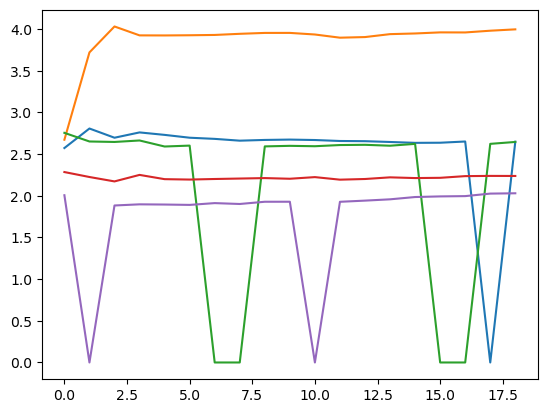

In [21]:
data_path = '../TimeSeries/Xenium/BreastSample1Rep1/GATA3_data.csv'
locs_path = '../TimeSeries/Xenium/BreastSample1Rep1/GATA3_locs.csv'
model_path = '../model_params/GATA3_model.pth'
# Set parameters
SEQ_LEN = 20
dim_inputs = 10
hidden_size = 100
latent_size = 100
# test
data, locs = read_data(data_path, locs_path, 20, 10)
test_data = data
test_loc = locs
net = Model(dim_inputs, hidden_size, latent_size, SEQ_LEN)
net.load_state_dict(torch.load(model_path))
prediction, generation, trans_status = test(test_data, test_loc, net)
for i in range(5):
    gen = generation[i].view(-1).cpu().detach().numpy()
    status = trans_status[i].view(-1).cpu().detach().numpy()
    plt.plot(status*gen)
plt.show()